In [1]:
import json
from matplotlib.font_manager import json_dump
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pylab as plt
import os
  
# Folder Path


sf_data = []
vicon_data = []
dataset_name = "run_diagonal_1"
path_sf = "/media/irfan-flw/OS/Arbeit/6GEM/Program_Development/6GEM_Dataset/sensorfloor_measurement/16092022"
file_name_sf = "sensor_floor_data_16092022_" + dataset_name + ".txt"

os.chdir(path_sf)
#file_path = f"{path}\{file_name}"
# threshold_sf_up = 1662115152.8
# threshold_sf_down = 1662115256
# threshold_vc_up = 1662115153.7486753
# threshold_vc_down = 1662115255.375461

#for line in open("../Dataset_sensor_floor/sensorfloor_measurement/16092022/sensor_floor_data_16092022_" + dataset_name + ".txt", "r"):
#for line in open("../../../media/irfan-flw/OS/Arbeit/6GEM/Program_Development/6GEM_Dataset/sensorfloor_measurement/16092022/sensor_floor_data_16092022_" + dataset_name + ".txt", "r"):
for line in open(file_name_sf, "r"):
    sf_data.append(json.loads(line))

df_sf = pd.DataFrame(sf_data)
#df_sf

## Build the dataframe of sensor floors ##

***Timestamp Interpolation***

In [ ]:
# #test timestamp interpolation
# #t_batch_i_now = np.zeros((23,15))
# t_batch_i_old = np.zeros((23,15))
# df_sf_buf = df_sf.copy()


# #df_sf_buf = df_sf_buf.reindex(df_sf_buf.columns.tolist() + ['ax','ay','az','gx','gy','gz','mx','my','mz','rssi'], axis=1) 
# out = []
# for index, row in df_sf_buf.T.items():
#     index_strip_id = int(df_sf_buf['strip_id'][index])
#     index_node_id = int(df_sf_buf['node_id'][index])
#     print('t_batch: ', df_sf_buf['timestamp'][index])
#     #t_batch_i_now[index_strip_id][index_node_id] = df_sf_buf['timestamp'][index]
#     #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
#     delta_t = 0
#     timestamp_i = 0

#     #check timestamp
#     if t_batch_i_old[index_strip_id-1][index_node_id-1] < df_sf_buf['timestamp'][index] and t_batch_i_old[index_strip_id-1][index_node_id-1] > 0:
#         delta_t = (df_sf_buf['timestamp'][index] - t_batch_i_old[index_strip_id-1][index_node_id-1])/len(df_sf_buf['data'][index])
        
#         for i in range(len(df_sf_buf['data'][index])):
#             t_i = t_batch_i_old[index_strip_id-1][index_node_id-1] + ((1+i)*delta_t)
#             if df_sf_buf['data'][index][i]['r'][0] < 0:
#                 #print('iter > 0: ', delta_t)
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
#             else:
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':np.nan,'timestamp':t_i})
#             #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
#         # t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]

#     elif t_batch_i_old[index_strip_id-1][index_node_id-1] == 0:
#         delta_t = 4/19
#         #print('iter 0: ', delta_t)
#         for i in range(len(df_sf_buf['data'][index])):
#             t_i = (df_sf_buf['timestamp'][index]-4) + ((1+i)*delta_t)
#             if df_sf_buf['data'][index][i]['r'][0] < 0:
#                 #print(t_i)
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
#             else:
#                 out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
#                     'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
#                     'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
#                     'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
#                     'r':np.nan,'timestamp':t_i})
#             print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
#         t_first = (df_sf_buf['timestamp'][index]) - 4           
#         t_batch_i_old[index_strip_id-1][index_node_id-1] = t_first
#         #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
    
    
#     t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]    
#     #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
        

# df_sf_final = pd.DataFrame(out)
# out.clear()
# df_sf_final

In [2]:
#test timestamp interpolation
#t_batch_i_now = np.zeros((23,15))
t_batch_i_old = np.zeros((23,15))
df_sf_buf = df_sf.copy()


#df_sf_buf = df_sf_buf.reindex(df_sf_buf.columns.tolist() + ['ax','ay','az','gx','gy','gz','mx','my','mz','rssi'], axis=1) 
out = []
for index, row in df_sf_buf.T.items():
    index_strip_id = int(df_sf_buf['strip_id'][index])
    index_node_id = int(df_sf_buf['node_id'][index])
    #print('t_batch: ', df_sf_buf['timestamp'][index])
    #t_batch_i_now[index_strip_id][index_node_id] = df_sf_buf['timestamp'][index]
    #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
    delta_t = 0
    timestamp_i = 0

    for i in range(len(df_sf_buf['data'][index])):

        #check timestamp
        if t_batch_i_old[index_strip_id-1][index_node_id-1] < df_sf_buf['timestamp'][index] and t_batch_i_old[index_strip_id-1][index_node_id-1] > 0:
            delta_t = (df_sf_buf['timestamp'][index] - t_batch_i_old[index_strip_id-1][index_node_id-1])/len(df_sf_buf['data'][index])
            
            t_i = t_batch_i_old[index_strip_id-1][index_node_id-1] + ((1+i)*delta_t)
            if df_sf_buf['data'][index][i]['r'][0] < 0:
                #print('iter > 0: ', delta_t)
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
            else:
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':np.nan,'timestamp':t_i})
                #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
            # t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]

        elif t_batch_i_old[index_strip_id-1][index_node_id-1] == 0:
            delta_t = 4/19
            #print('iter 0: ', delta_t)
            t_i = (df_sf_buf['timestamp'][index]-4) + ((1+i)*delta_t)
            if df_sf_buf['data'][index][i]['r'][0] < 0:
                #print(t_i)
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':df_sf_buf['data'][index][i]['r'][0],'timestamp':t_i})
            else:
                out.append({'strip_id':df_sf_buf['strip_id'][index],'node_id':df_sf_buf['node_id'][index],
                    'ax':df_sf_buf['data'][index][i]['a'][0],'ay':df_sf_buf['data'][index][i]['a'][1],'az':df_sf_buf['data'][index][i]['a'][2],
                    'gx':df_sf_buf['data'][index][i]['g'][0],'gy':df_sf_buf['data'][index][i]['g'][1],'gz':df_sf_buf['data'][index][i]['g'][2],
                    'mx':df_sf_buf['data'][index][i]['m'][0],'my':df_sf_buf['data'][index][i]['m'][1],'mz':df_sf_buf['data'][index][i]['m'][2],
                    'r':np.nan,'timestamp':t_i})
            #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
            t_first = (df_sf_buf['timestamp'][index]) - 4           
            t_batch_i_old[index_strip_id-1][index_node_id-1] = t_first
            #print(t_batch_i_old[index_strip_id-1][index_node_id-1])
    
    
    t_batch_i_old[index_strip_id-1][index_node_id-1] = df_sf_buf['timestamp'][index]    
    #print(out[index]['strip_id'], out[index]['node_id'],'t_old: ', t_batch_i_old[index_strip_id-1][index_node_id-1], 't_now: ', df_sf_buf['timestamp'][index], out[index]['timestamp'])
        

df_sf_final = pd.DataFrame(out)
del(out)
#df_sf_final

**Build Dataset of VICON Coordinates**

In [3]:
#DATASET OF VICON COORDINATES
#for line in open("../Dataset_sensor_floor/vicon_measurement/16092022/vicon_data_16092022_" + dataset_name + ".txt", "r"):
path_vicon = "/media/irfan-flw/OS/Arbeit/6GEM/Program_Development/6GEM_Dataset/vicon_measurement/16092022"
file_name_vicon = "vicon_data_16092022_" + dataset_name + ".txt"

os.chdir(path_vicon)

for line in open(file_name_vicon, "r"):
    vicon_data.append(json.loads(line))

df_vicon = pd.DataFrame(vicon_data)
#df_vicon['time'] = pd.to_datetime(df_vicon['time'],unit='s')
df_vicon.shape

(37588, 4)

In [4]:
df_vicon_buf = df_vicon.copy()
df_vicon_buf = df_vicon_buf.reindex(df_vicon_buf.columns.tolist() + ['X','Y'], axis=1) 

for index, row in df_vicon_buf.T.items():
    for i in range(len(df_vicon_buf['translation'][index])):
        #print((test_df['data'][index][i]['r']))
        df_vicon_buf.loc[index,'X'] = df_vicon_buf['translation'][index][0]
        df_vicon_buf.loc[index,'Y'] = df_vicon_buf['translation'][index][1]

df_vicon_buf = df_vicon_buf.drop(columns=['object','translation','rotation'])
#df_vicon_buf

***Filter and Resample Vicon Data***

In [5]:

threshold_sf_up = 1663337798.499045
threshold_sf_low = 1663337796.8056197
df_vicon_buf = df_vicon_buf[(df_vicon_buf['time'] < threshold_sf_low) | (df_vicon_buf['time'] > threshold_sf_up)]
# # df_sf_filter = df_sf_final[(df_sf_final['timestamp'] < threshold_sf_down)]
#df_vicon_buf

In [6]:
df_vicon_resample = df_vicon_buf.copy()
df_vicon_resample['time_resample'] = pd.to_datetime(df_vicon_resample['time'],unit='s')
#df_vicon_resample['time'] = df_vicon_resample['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f'))
df_vicon_resample = df_vicon_resample.set_index('time_resample')
df_vicon_final = df_vicon_resample.resample('40ms').ffill()
df_vicon_final = df_vicon_final.dropna()
df_vicon_final

,time,X,Y
time_resample,,,
2022-09-16 14:14:27.009869824,1.663338e+09,-8.482807,4.468840
2022-09-16 14:14:27.011841024,1.663338e+09,-8.482861,4.468878
2022-09-16 14:14:27.016714496,1.663338e+09,-8.482873,4.468873
2022-09-16 14:14:27.023484416,1.663338e+09,-8.482857,4.468843
2022-09-16 14:14:27.026484992,1.663338e+09,-8.482833,4.468869
...,...,...,...
2022-09-16 14:17:35.854439936,1.663338e+09,7.734623,-3.288501
2022-09-16 14:17:35.859590400,1.663338e+09,7.734622,-3.288517
2022-09-16 14:17:35.864001024,1.663338e+09,7.734622,-3.288509


In [7]:
# # df_vicon_resample = df_vicon_final.copy()
# # df_vicon_resample['time'] = pd.to_datetime(df_vicon_resample['time'],unit='s')
# df_vicon_final = df_vicon_resample.resample('40ms').ffill()
# df_vicon_final = df_vicon_final.dropna()
# #df_vicon_final

In [ ]:
# df_vicon_final['time'] = df_vicon_final.index.astype(np.int64) / int(1e9)
# df_vicon_final

In [ ]:
# df_vicon_final.to_csv('vicon_data_run1_diagonal_resample.csv')

**MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION**

In [ ]:
# #MERGE RSSI HEATMAP & VICON COORDINATES WITH ANIMATION

# #Heatmap animation over the time
# from turtle import width
# import matplotlib.animation as animation
# %matplotlib ipympl
# from matplotlib.widgets import Slider, Button, RadioButtons
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# #DEFINE DATASET ARRAY
# x_sf = df_sf_filter['strip_id'].to_numpy()
# y_sf = df_sf_filter['node_id'].to_numpy()
# z_sf = df_sf_filter['rssi'].to_numpy()
# t_sf = df_sf_filter['timestamp'].to_numpy()
# dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
# numDataPoints_sf = len(t_sf)
# num_of_nodes = 15
# num_of_strips = 23


# #CREATE 3D ARRAY FOR HEATMAP
# rssi_mat = np.empty((numDataPoints_sf,15,23))
# timestamp_arr = np.empty((numDataPoints_sf,15,23))
# fig = plt.figure(figsize=(15, 9))

# for index in range(numDataPoints_sf):
#     for node in range(num_of_nodes):
#         for strip in range(num_of_strips):
#             if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
#                 rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
#                 timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
#             else:
#                 rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
#                 timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]


# numDataPoints_sf = dataSet_sf.shape[1]

# delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

# #-------------------------------------------------------------------------------------------------------------------#

# #CREATE DATASET FOR VICON COORDINATES
# t_vc = df_vicon_filter['time'].to_numpy()
# x_vc = df_vicon_filter['X'].to_numpy()
# y_vc = df_vicon_filter['Y'].to_numpy()
# dataSet_vc = np.array([x_vc, y_vc, t_vc])
# numDataPoints_vc = len(t_vc)


# numDataPoints_vc = dataSet_vc.shape[1]

# delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
# #-------------------------------------------------------------------------------------------------------------------#

# # GET SOME MATPLOTLIB OBJECTS
# #fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
# fig = plt.figure(figsize=(12,14))
# #plt.subplots_adjust(bottom=0.25)


# # AXES PROPERTIES RSSI HEATMAP
# ax1 = fig.add_subplot(211) #(row, column, pos)
# #ax1.set_autoscale_on
# ax1.set_xlabel('Strip ID')
# ax1.set_ylabel('Node ID')
# ax1.set_title('RSSI Heatmap')

# # # AXES PROPERTIES VICON COORDINATES
# ax2 = fig.add_subplot(212)
# ax2.set_xlim(-11.185, 10.185)
# ax2.set_ylim(-6.425, 7.575)
# ax2.set_xlabel('X(t)')
# ax2.set_ylabel('Y(t)')
# ax2.set_title('Trajectory of robot')


# #DISPLAY INITIAL IMAGE
# im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
# axins = inset_axes(ax1,
#                    width="1%",  # width = 5% of parent_bbox width
#                    height="90%",  # height : 50%
#                    loc='lower left',
#                    bbox_to_anchor=(1.05, 1.25, 1, 1),
#                    bbox_transform=ax2.transAxes,
#                    borderpad=0,
#                    )
# cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
# cbar.set_label(label='RSSI (dBm)', size=15)
# cbar.ax.tick_params(labelsize=12)

# line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def animate(num, rssi_mat, line, dataSet_sf, dataSet_vc):
#     line.set_xdata(dataSet_vc[0, :num])
#     line.set_ydata(dataSet_vc[1, :num])
#     index_rssi = find_nearest(dataSet_sf[3], dataSet_vc[2,num])
#     im_h.set_data(rssi_mat[index_rssi]) 
#     return line

# plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
# anim = animation.FuncAnimation(fig, animate, frames=numDataPoints_vc, fargs=(rssi_mat, line, dataSet_sf, dataSet_vc), interval=1, repeat=False, blit=False)
# # anim.save(r'Animation_Move_Around4_17082022.mp4')

# plt.show()

**MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER**

dataset vc old: (3, 4721)


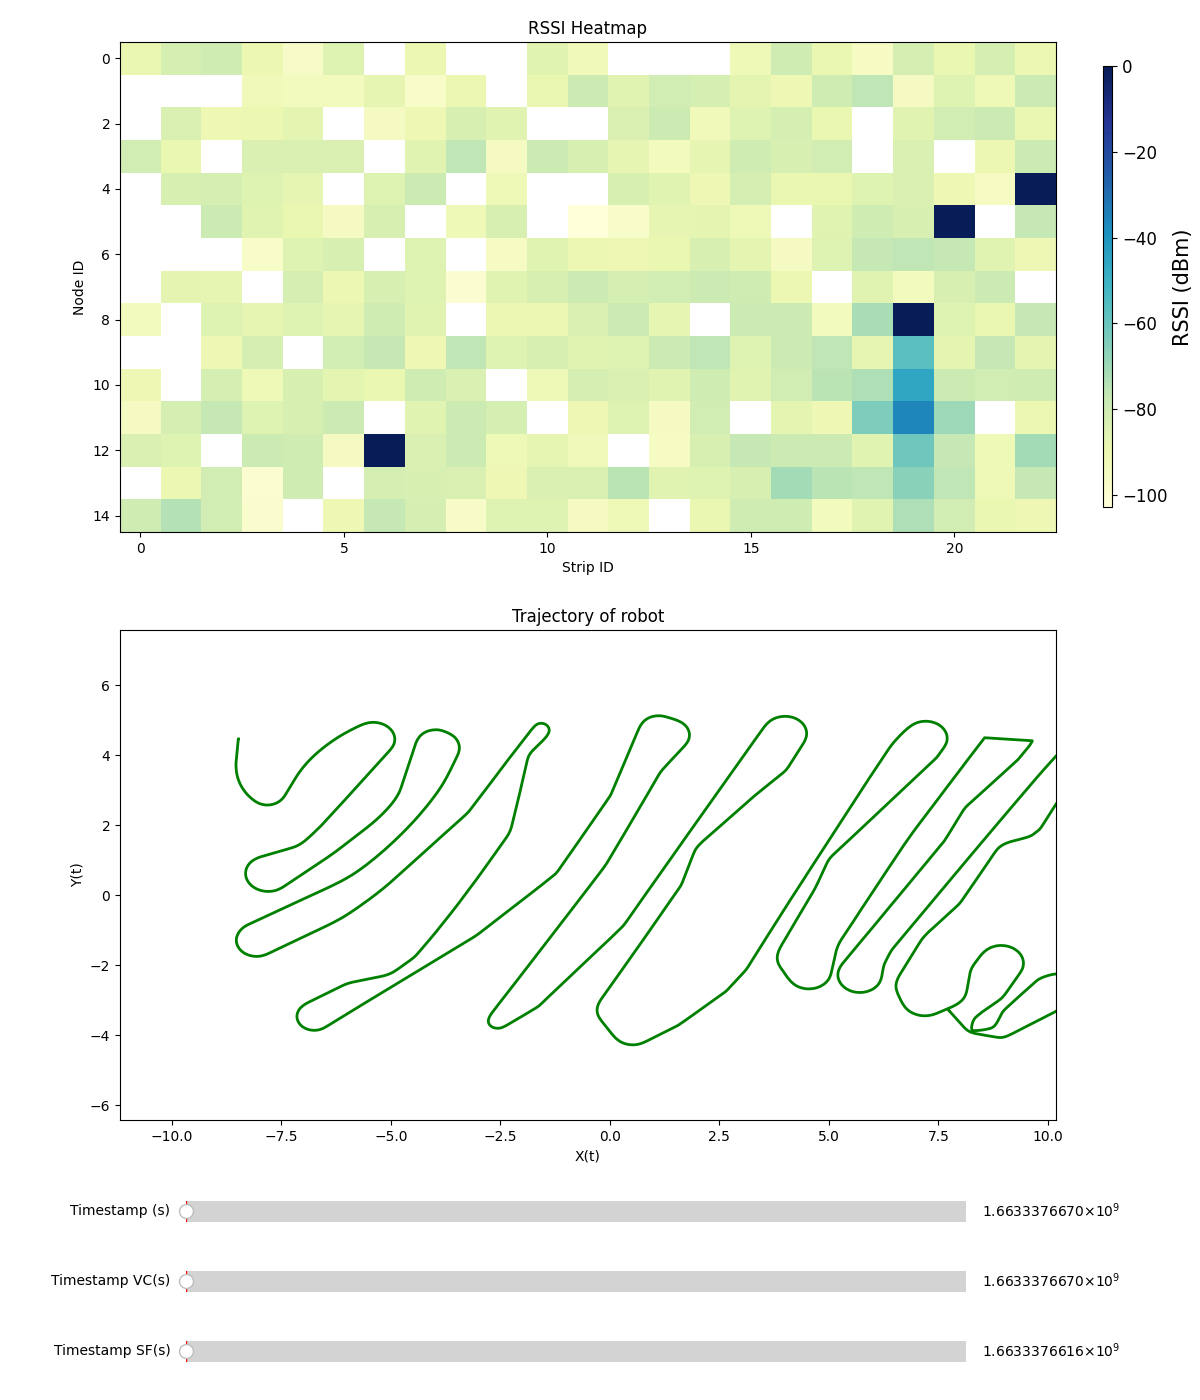

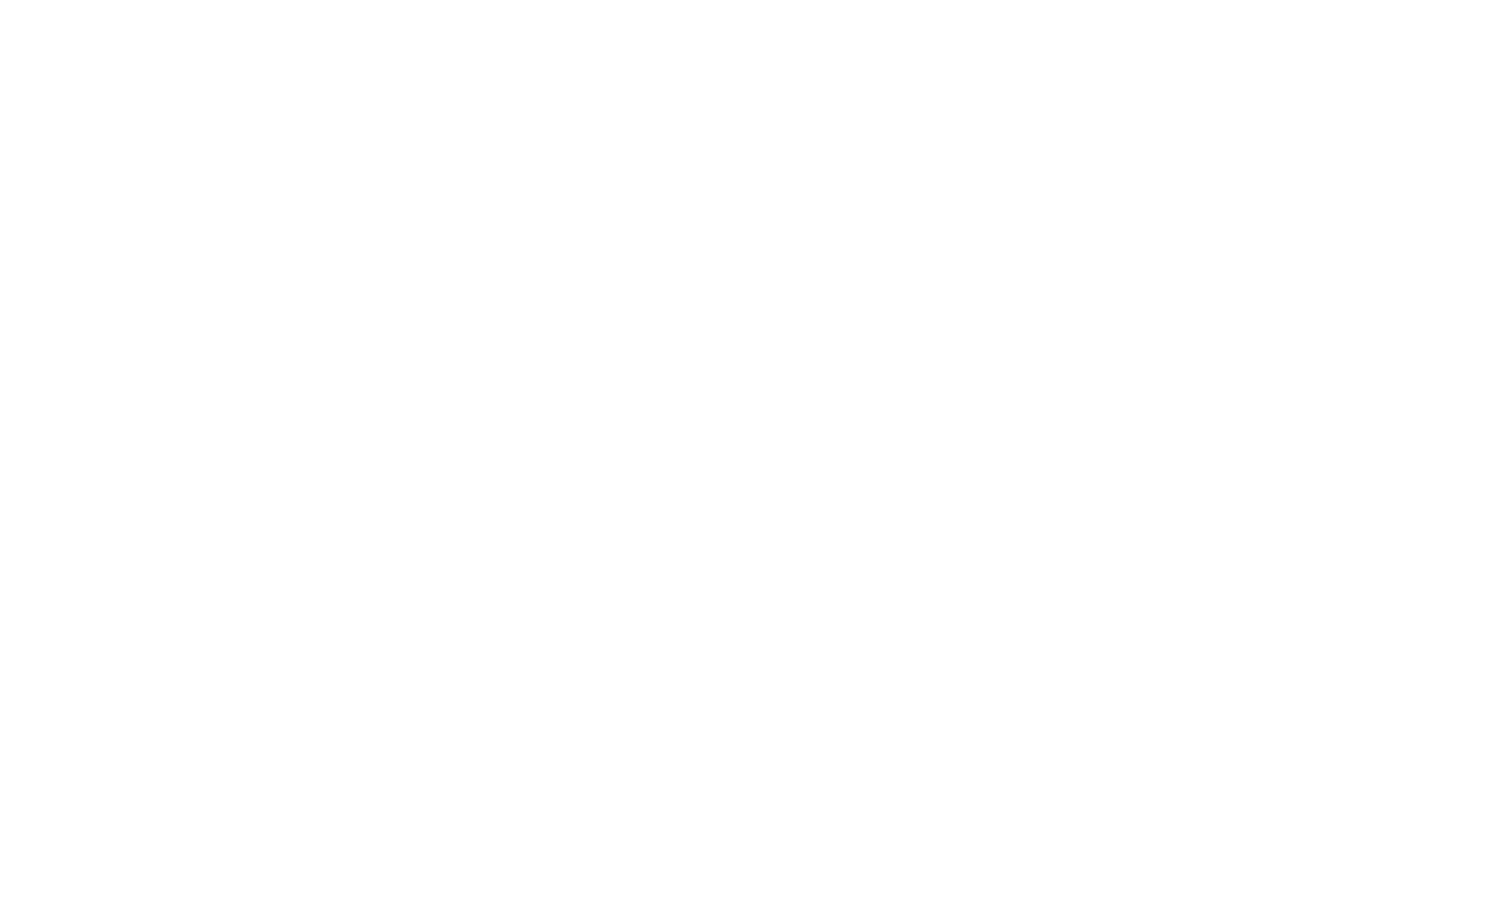

1663337668.7166467
1663337669.2365427
1663337669.7164469
1663337670.1963508
1663337670.4363027
1663337670.9162068
1663337671.3961108
1663337671.8760147
1663337672.1159668
1663337672.5958707
1663337673.0757747
1663337673.3157268
1663337673.8356228
1663337674.3155267
1663337674.7954307
1663337675.0353827
1663337675.5152867
1663337675.9951909
1663337676.4750948
1663337676.715047
1663337677.1949508
1663337677.6748548
1663337677.9148068
1663337678.4347029
1663337678.9146068
1663337679.3945107
1663337679.6344628
1663337680.1143668
1663337680.5942707
1663337681.074175
1663337681.3141267
1663337681.7940307
1663337682.2739348
1663337682.5138867
1663337683.0337827
1663337683.5136867
1663337683.9935908
1663337684.2335427
1663337684.7134469
1663337685.1933508
1663337685.6732547
1663337685.9132068
1663337686.3931108
1663337686.8730147
1663337687.1129668
1663337687.6328628
1663337688.1127667
1663337688.5926707
1663337688.8326228
1663337689.3125267
1663337689.7924309
1663337690.2723348
1663337690.512

In [8]:
#MERGE RSSI HEATMAP & VICON COORDINATES WITH SLIDER

#Heatmap animation over the time
from turtle import width
import matplotlib.animation as animation
%matplotlib ipympl
from matplotlib.widgets import Slider, Button, RadioButtons
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#DEFINE DATASET ARRAY
x_sf = df_sf_final['strip_id'].to_numpy()
y_sf = df_sf_final['node_id'].to_numpy()
z_sf = df_sf_final['r'].to_numpy()
t_sf = df_sf_final['timestamp'].to_numpy()
dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
numDataPoints_sf = len(t_sf)
num_of_nodes = 15
num_of_strips = 23


#CREATE 3D ARRAY FOR HEATMAP
rssi_mat = np.empty((numDataPoints_sf,15,23))
timestamp_arr = np.empty((numDataPoints_sf,15,23))
fig = plt.figure(figsize=(15, 9))

for index in range(numDataPoints_sf):
    for node in range(num_of_nodes):
        for strip in range(num_of_strips):
            if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
                rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
                timestamp_arr[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[3][index])
            else:
                rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]
                timestamp_arr[index][node][strip] = timestamp_arr[index-1][node][strip]


numDataPoints_sf = dataSet_sf.shape[1]
# print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# print(dataSet_sf)

delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

#print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

#-------------------------------------------------------------------------------------------------------------------#

#CREATE DATASET FOR VICON COORDINATES
t_vc = df_vicon_final['time'].to_numpy()
x_vc = df_vicon_final['X'].to_numpy()
y_vc = df_vicon_final['Y'].to_numpy()
dataSet_vc = np.array([x_vc, y_vc, t_vc])
numDataPoints_vc = len(t_vc)

print("dataset vc old:", dataSet_vc.shape)

numDataPoints_vc = dataSet_vc.shape[1]
# print("dataset vc:",dataSet_vc.shape)
# print(dataSet_vc)

delta_t_vc = round((t_vc.max()-t_vc.min())/numDataPoints_vc, 6)
#-------------------------------------------------------------------------------------------------------------------#

# GET SOME MATPLOTLIB OBJECTS
#fig, (ax1, ax2) = plt.subplots(figsize=(10,12), nrows=2)
fig = plt.figure(figsize=(12,14))
plt.subplots_adjust(bottom=0.25)


# AXES PROPERTIES RSSI HEATMAP
ax1 = fig.add_subplot(211) #(row, column, pos)
#ax1.set_autoscale_on
ax1.set_xlabel('Strip ID')
ax1.set_ylabel('Node ID')
ax1.set_title('RSSI Heatmap')

# # AXES PROPERTIES VICON COORDINATES
ax2 = fig.add_subplot(212)
ax2.set_xlim(-11.185, 10.185)
ax2.set_ylim(-6.425, 7.575)
ax2.set_xlabel('X(t)')
ax2.set_ylabel('Y(t)')
ax2.set_title('Trajectory of robot')


# Defining the Slider button
# xposition, yposition, width and height
ax_slide_sf = plt.axes([0.155, 0.02, 0.65, 0.03])
ax_slide_vc = plt.axes([0.155, 0.07, 0.65, 0.03])
ax_slide_merge = plt.axes([0.155, 0.12, 0.65, 0.03])


#DISPLAY INITIAL IMAGE
im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu", aspect='auto')
axins = inset_axes(ax1,
                   width="1%",  # width = 5% of parent_bbox width
                   height="90%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 1.25, 1, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0,
                   )
cbar = plt.colorbar(im_h, cax=axins, ax=ax1)
cbar.set_label(label='RSSI (dBm)', size=15)
cbar.ax.tick_params(labelsize=12)


#cbar.ax.set_axes_locator
# #cbar.set_ticks()

line = ax2.plot(dataSet_vc[0], dataSet_vc[1], lw=2, c='g')[0] # For line plot


# Properties of the slider

#normal data
timestamp_rssi = Slider(ax_slide_sf, 'Timestamp SF(s)',
                  t_sf.min(), t_sf.max(), valinit=t_sf.min(), valstep=delta_t_sf)
timestamp_vc = Slider(ax_slide_vc, 'Timestamp VC(s)',
                  t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)
timestamp_merge = Slider(ax_slide_merge, 'Timestamp (s)',
                  t_vc.min(), t_vc.max(), valinit=t_vc.min(), valstep=delta_t_vc)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


def update_heatmap(val):
    pos = timestamp_rssi.val
    index = find_nearest(dataSet_sf[3], pos)
    im_h.set_data(rssi_mat[index])

def update_coord(val):
    pos = timestamp_vc.val
    index = find_nearest(dataSet_vc[2], pos)
    line.set_xdata(dataSet_vc[0, :index])
    line.set_ydata(dataSet_vc[1, :index])

    #redrawing the figure
    fig.canvas.draw()    

def update_all(val):
    pos = timestamp_merge.val
    print(pos)
    index = find_nearest(dataSet_vc[2], pos)
    line.set_xdata(dataSet_vc[0, :index])
    line.set_ydata(dataSet_vc[1, :index])

    index2 = find_nearest(dataSet_sf[3], pos)
    im_h.set_data(rssi_mat[index2])

    #redrawing the figure
    fig.canvas.draw() 

# Calling the function "update" when the value of the slider is changed
timestamp_rssi.on_changed(update_heatmap)
timestamp_vc.on_changed(update_coord)
timestamp_merge.on_changed(update_all)

#fig.tight_layout()
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.88, top=0.97, hspace=0.2)
#plt.subplots_adjust(left=0.155, bottom=0.2, right=0.91, top=0.97, hspace=0.2)
#plt.subplot_tool()
plt.show()

**Check the index of closest timestamp to Vicon Dataset**

In [10]:
# threshold_sf_up = 1663337798.499045
# threshold_sf_low = 1663337796.8056197
closest_index_sf = []
for i in range(numDataPoints_vc):
    pos = t_vc[i]
    print(pos)

    index_sf = find_nearest(dataSet_sf[3], pos)
    closest_index_sf.append(index_sf)
print(len(closest_index_sf), closest_index_sf)

1663337667.0369828
1663337667.076687
1663337667.1161253
1663337667.157051
1663337667.1975315
1663337667.2365367
1663337667.276812
1663337667.316709
1663337667.3562284
1663337667.3971488
1663337667.4367573
1663337667.4769838
1663337667.516587
1663337667.556401
1663337667.597147
1663337667.6365724
1663337667.6768043
1663337667.7168791
1663337667.7559993
1663337667.796855
1663337667.838705
1663337667.876509
1663337667.9188247
1663337667.9564292
1663337667.9964833
1663337668.036022
1663337668.0778997
1663337668.1165655
1663337668.1566823
1663337668.1972957
1663337668.236776
1663337668.2779558
1663337668.318833
1663337668.356582
1663337668.3977854
1663337668.436542
1663337668.476734
1663337668.5163252
1663337668.5595074
1663337668.5965345
1663337668.6363802
1663337668.6765873
1663337668.7166133
1663337668.7565436
1663337668.7917244
1663337668.8367174
1663337668.876249
1663337668.9164956
1663337668.9587212
1663337668.996336
1663337669.0373313
1663337669.0769093
1663337669.1167002
1663337669.

In [ ]:
# plt.savefig('../Dataset_sensor_floor/Dataset_Final/16092022/' + dataset_name + '.png', dpi=300)

**CREATE FRAME FOR MERGED DATASET**

In [15]:
df_sf_assoc = df_sf_final.iloc[closest_index_sf].reset_index()
df_sf_assoc

,index,strip_id,node_id,ax,ay,az,gx,gy,gz,mx,my,mz,r,timestamp
0,3422,16,1,0.004639,-0.026611,1.007324,2.198473,1.480916,1.732824,12.75,20.70,26.85,-94.0,1.663338e+09
1,3497,7,1,0.070557,0.111572,1.052490,0.625954,0.755725,2.641221,91.80,253.20,39.90,-85.0,1.663338e+09
2,7401,13,1,0.062012,0.029053,1.040771,-0.259542,0.366412,0.709924,-84.30,-61.50,-0.90,-92.0,1.663338e+09
3,8172,19,13,0.051270,0.096924,1.060059,-1.671756,0.694656,0.709924,-1.95,57.15,50.25,NaN,1.663338e+09
4,3667,22,5,0.073730,0.140381,1.053711,-1.335878,1.152672,1.145038,3.00,24.90,-125.85,-88.0,1.663338e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716,283958,15,8,0.045654,0.125488,1.028076,-1.297710,0.954198,0.824427,43.35,92.10,235.95,-80.0,1.663338e+09
4717,286737,22,8,0.041260,0.093506,1.032959,-1.931298,0.786260,1.381679,315.60,18.00,88.65,-78.0,1.663338e+09
4718,286417,6,5,0.047607,0.086914,1.054443,-2.587786,1.977099,0.931298,172.65,-11.40,73.20,NaN,1.663338e+09
4719,289872,16,7,0.042969,0.087891,1.051270,-1.045802,1.450382,1.717557,118.50,115.20,-99.15,-89.0,1.663338e+09


In [13]:
df_sf_assoc.to_csv('result_sf_associate.csv')

In [ ]:
# #CREATE ARRAY FOR DATA SENSORS
# from tqdm import tqdm_notebook as tqdm


# path = "/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter"

# os.chdir(path)

# KEYS = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']
# Vicon_Coords = pd.read_csv("vicon_node_positions.csv")
# df_data = Vicon_Coords[['strip_id','node_id']]
# df_data = df_data.astype('int32')

# #CREATE 4D ARRAY

# X = np.zeros([23, 15, 11])


# # init_frame()
# def generate_frame(X):
#     X_df = X.reshape([345,11])
#     df_X = pd.DataFrame(X_df, columns=KEYS)
#     df_data[['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']] = df_X
#     #df_X[['strip_id','node_id']] = strip_node_df

#     #print(df_data)
#     frame_i = df_data.to_json(orient='columns')
#     #print(frame_i)

#     return frame_i


# def get_data_from_data_frame(df_data):
#     #X = np.zeros([23, 15, 11])
#     #frame = {}
#     for i, key in enumerate(KEYS):
#         X[int(df_data.strip_id) - 1, int(df_data.node_id) - 1, i] = df_data[key]
    
#     frame = generate_frame(X)
#     # X_df = X_df.reshape([345,11])
#     # df_X = pd.DataFrame(X_df, columns=KEYS)
#     #print(df_X)
#     t = df_data.timestamp

#     return X, t, frame

# def build_sensor_array(df):

#     X = np.zeros([len(df), 23, 15, 11])
#     t = np.zeros([len(df), 1])
#     frames = []

#     # Generate a single frame for each row
#     for index, row in tqdm(df.T.items(), total=len(df)):

#         df_i = row
        
#         X_i, t_i, frame_i = get_data_from_data_frame(df_i)
#         X[index] = X_i
#         t[index] = t_i
#         frames.append(frame_i)
#         #print(X[index])
    
#     return X, t, frames

# sensor_data, t_data, frames = build_sensor_array(df_sf_final)

# print(sensor_data.shape, t_data.shape, len(frames))

**CREATE ARRAY FOR DATA SENSORS**

In [16]:
#CREATE ARRAY FOR DATA SENSORS
from tqdm import tqdm_notebook as tqdm


path = "/home/irfan-flw/6GEM/Coding/Vicon_Pos_Converter"

os.chdir(path)

KEYS = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']
Vicon_Coords = pd.read_csv("vicon_node_positions.csv")
df_data = Vicon_Coords[['strip_id','node_id']]
df_data = df_data.astype('int32')

X = np.zeros([len(df_sf_assoc), 23, 15, 11])
t = np.zeros([len(df_sf_assoc), 1])
#frames = []
frames = []

X_i = np.zeros([23, 15, 11])

for index, row in tqdm(df_sf_assoc.T.items(), total=len(df_sf_assoc)):
#for index, row in df_sf_assoc.T.items():

    df_i = row

    for i, key in enumerate(KEYS):
        X_i[int(df_i.strip_id) - 1, int(df_i.node_id) - 1, i] = df_i[key]
    
    X_df = X_i.reshape([345,11])
    df_X = pd.DataFrame(X_df, columns=KEYS)
    df_data[['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'r', 'timestamp']] = df_X
    frame_i = df_data.to_json(orient='columns')
    
    t_i = df_i.timestamp

    X[index] = X_i
    t[index] = t_i
    #frames.insert(index, frame_i)
    frames.append(frame_i)
    #print(index,'/',len(df_sf_final))

# #CREATE 4D ARRAY
print(X.shape, t.shape, len(frames))

/tmp/ipykernel_8601/41177457.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for index, row in tqdm(df_sf_assoc.T.items(), total=len(df_sf_assoc)):


  0%|          | 0/4721 [00:00<?, ?it/s]

(4721, 23, 15, 11) (4721, 1) 4721


**Check index of timestamp threshold**

In [19]:
#Filter out the array - Uncomment if necessary

# def closest_timestamp(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# index_low_X = closest_timestamp(t_data, threshold_sf_low)
# index_low_vc = closest_timestamp(dataSet_vc[2], threshold_sf_low)
# index_up_X = closest_timestamp(t_data, threshold_sf_up)
# index_up_vc = closest_timestamp(dataSet_vc[2], threshold_sf_up)

# print(index_low_X,index_up_X, index_low_vc,index_up_vc)

# sensor_data_final = sensor_data[index_low_X:index_up_X]
# t_data_final = t_data[index_low_X:index_up_X]
# frames_final = frames[index_low_X:index_up_X]
# dataSet_vc_final = dataSet_vc[:,index_low_vc:index_up_vc]
# dataSet_vc_final = np.transpose(dataSet_vc_final)

sensor_data_final = X[:]
t_data_final = t[:]
frames_final = frames[:]
dataSet_vc_final = dataSet_vc[:,:]
dataSet_vc_final = np.transpose(dataSet_vc_final)


print(sensor_data_final.shape, t_data_final.shape, len(frames_final), dataSet_vc_final.shape)

(4721, 23, 15, 11) (4721, 1) 4721 (4721, 3)


In [32]:
#MERGE DATASET

#dataSet_vc_final = np.transpose(dataSet_vc_final)
frame_number = np.empty(dataSet_vc_final.shape[1], dtype=object)
frame_data = np.empty(dataSet_vc_final.shape[1], dtype=object)
frame_count = 0
for row in range(dataSet_vc_final.shape[1]):
    time_vc = dataSet_vc[2][row]
    #index_vc = closest_timestamp(dataSet_vc[2], time_vc)
    #index_sf = closest_timestamp(t_data_final, time_vc)

    frame_number[row] = str(frame_count)
    frame_data[row] = frames_final[row]
    frame_count += 1

**GENERATES THE DATASET AS .CSV FILE**

In [35]:
array_frame_vc = dataSet_vc_final.astype(object)

dataSet_final = np.array([frame_number, array_frame_vc[0,:], array_frame_vc[1,:], frame_data])
dataSet_final = np.transpose(dataSet_final)
#dataSet_final.shape
frame_sf = pd.DataFrame(dataSet_final, columns=['frame_number','vicon_x','vicon_y','data'])
data_dir = '../Dataset_sensor_floor/Dataset_Final/16092022/'
csv_name = data_dir + 'dataset_1609022_' + dataset_name + '.csv'
frame_sf.to_csv(csv_name, index=False)
dataSet_final

array([['0', -8.482865215730843, 4.468862853077047,
        '{"strip_id":{"0":1,"1":1,"2":1,"3":1,"4":1,"5":1,"6":1,"7":1,"8":1,"9":1,"10":1,"11":1,"12":1,"13":1,"14":1,"15":2,"16":2,"17":2,"18":2,"19":2,"20":2,"21":2,"22":2,"23":2,"24":2,"25":2,"26":2,"27":2,"28":2,"29":2,"30":3,"31":3,"32":3,"33":3,"34":3,"35":3,"36":3,"37":3,"38":3,"39":3,"40":3,"41":3,"42":3,"43":3,"44":3,"45":4,"46":4,"47":4,"48":4,"49":4,"50":4,"51":4,"52":4,"53":4,"54":4,"55":4,"56":4,"57":4,"58":4,"59":4,"60":5,"61":5,"62":5,"63":5,"64":5,"65":5,"66":5,"67":5,"68":5,"69":5,"70":5,"71":5,"72":5,"73":5,"74":5,"75":6,"76":6,"77":6,"78":6,"79":6,"80":6,"81":6,"82":6,"83":6,"84":6,"85":6,"86":6,"87":6,"88":6,"89":6,"90":7,"91":7,"92":7,"93":7,"94":7,"95":7,"96":7,"97":7,"98":7,"99":7,"100":7,"101":7,"102":7,"103":7,"104":7,"105":8,"106":8,"107":8,"108":8,"109":8,"110":8,"111":8,"112":8,"113":8,"114":8,"115":8,"116":8,"117":8,"118":8,"119":8,"120":9,"121":9,"122":9,"123":9,"124":9,"125":9,"126":9,"127":9,"128":9,"129

In [ ]:
frame_sf